# Image Multiclass Classification

Author: Rafael Godoy

LinkedIn: https://www.linkedin.com/in/Rafael-Godoy-ML-Eng

Github: https://github.com/RafaelSilvaGodoy


This notebook will show a Neural Network **Inception** from VGG16 + dense layers creation for **Image Multiclass Classification**.

The Image classes in the dataset are the following:

0. Airplane										
1. Automobil
2. Bird
3. Cat
4. Deer
5. Dog
6. Frog
7. Horse
8. Ship
9. Truck

Image information:
- RGB;
- 32x32x3;
- Luminosity intensity 0 to 255;


The dataset was provided by [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html).

The inception network will be [VGG16](https://neurohive.io/en/popular-networks/vgg16/) with 'ImageNet' weights.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


import random
# Set seed to 42 for reproducibility.
random.seed(42)

## Data Preparation

In [2]:
classes_dict = {0:'Airplane', 1:'Automobil', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship', 9:'Truk'}

# The CIFAR-10 dataset can be imported by tf.keras.datasets.cifar10.load_data() method.
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = tf.keras.datasets.cifar10.load_data()

print("Shape x_train_orig:", x_train_orig.shape, "Shape y_train_orig:", y_train_orig.shape)
print("Shape x_test_orig:", x_test_orig.shape, "Shape y_test:", y_test_orig.shape)

170508288/170498071 [==============================] - 11s 0us/step
Shape x_train_orig: (50000, 32, 32, 3) Shape y_train_orig: (50000, 1)
Shape x_test_orig: (10000, 32, 32, 3) Shape y_test: (10000, 1)


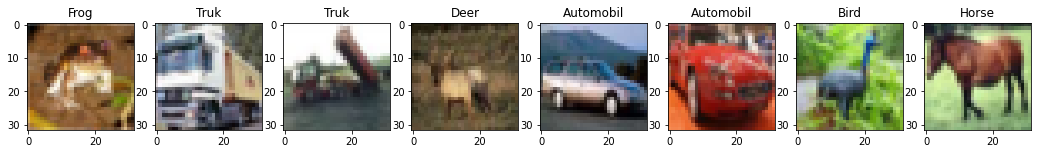

In [3]:
# Image exemples
fig, axs = plt.subplots(1, 8, figsize=(18, 5))
index = 0
for j in range(8):
  axs[j].imshow(x_train_orig[index])
  axs[j].title.set_text(classes_dict[y_train_orig[index][0]])
  index += 1
plt.show()

In [4]:
# Input data
# Notice that just a fraction of the images will be used to train the NN due to computational process time.
x_train = x_train_orig[:40_000]
x_val = x_train_orig[:6_000]
x_test = x_test_orig[:6_000]

# Output data
y_train = y_train_orig[:40_000]
y_val = y_train_orig[:6_000]
y_test = y_test_orig[:6_000]

print("Input train tensor shape =", x_train.shape)
print("Input validation tensor shape =", x_val.shape)
print("Input test tensor shape =", x_test.shape)
print("Output train tensor shape =", y_train.shape)
print("Output validation tensor shape =", y_val.shape)
print("Output test tensor shape =", y_test.shape)

Input train tensor shape = (40000, 32, 32, 3)
Input validation tensor shape = (6000, 32, 32, 3)
Input test tensor shape = (6000, 32, 32, 3)
Output train tensor shape = (40000, 1)
Output validation tensor shape = (6000, 1)
Output test tensor shape = (6000, 1)


In [5]:
# Saves the image dimension
image_dim = x_train.shape[1:4]
print("Input image dimension=", image_dim)

# Normalize the input data so that the Luminosity intensity be a float number between 0 and 1. 
x_train = x_train/255.
x_val = x_val/255.
x_test = x_test/255.

Input image dimension= (32, 32, 3)


In [6]:
from tensorflow.keras.utils import to_categorical

# Encode the output using One-Hot-Encoder.
# eg: if the output is the class 3, it will be encoded as [0 0 1 0 0 0 0 0 0 0]
#     if the output is the class 7, it will be encoded as [0 0 0 0 0 0 0 1 0 0]
y_train_hot = tf.keras.utils.to_categorical(y_train)
y_val_hot = tf.keras.utils.to_categorical(y_val)
y_test_hot = tf.keras.utils.to_categorical(y_test)

print('Output train tensor shape = ', y_train_hot.shape)
print('Output validation tensor shape = ', y_val_hot.shape)
print('Output test tensor shape = ', y_test_hot.shape)

Output train tensor shape =  (40000, 10)
Output validation tensor shape =  (6000, 10)
Output test tensor shape =  (6000, 10)


## Neural Network Inception

In [7]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import VGG16

# Load the VGG16 with 'imaginet' weights excluding its dense layers. 
rna_base = VGG16(weights='imagenet', include_top = False, input_shape = image_dim)

# VGG16's Architecture
rna_base.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

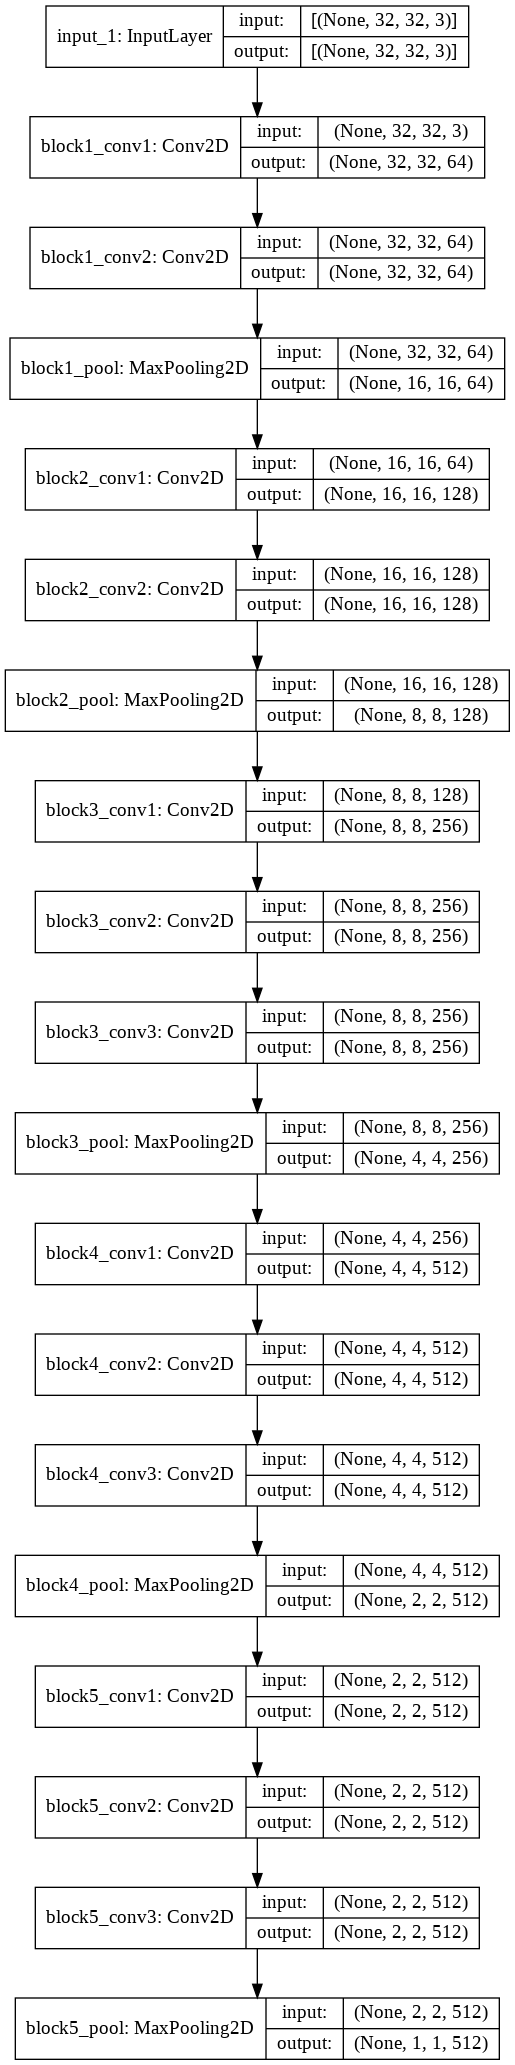

In [8]:
# VGG16's Schema
plot_model(rna_base, to_file='VGG16.png', show_shapes=True)

Train images features tensor dimension =  (40000, 1, 1, 512)
Validation images features tensor dimension =  (6000, 1, 1, 512)
Test images features tensor dimension =  (6000, 1, 1, 512)

A filter characteristic demonstration.
Notice that it doesn't have a human meaning, but it contains important image features for the NN.


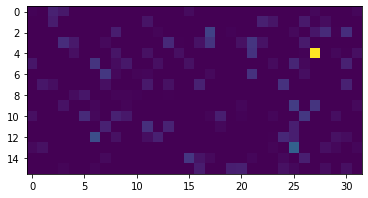

In [9]:
# Feature extraction
# Get some characteristics of the figures from the already trained VGG16's convolutional layers.
train_features = rna_base.predict(x_train)
val_features = rna_base.predict(x_val)
test_features = rna_base.predict(x_test)

print("Train images features tensor dimension = ", train_features.shape)
print("Validation images features tensor dimension = ", val_features.shape)
print("Test images features tensor dimension = ", test_features.shape)
print('')
print("A filter characteristic demonstration.")
print("Notice that it doesn't have a human meaning, but it contains important image features for the NN.")
plt.imshow(train_features[0,0,0,:].reshape(-1,32))


In [10]:
# Retrives some dimension shapes.
m, nlin, ncol, nfeat = train_features.shape
m_val = val_features.shape[0]
m_test = test_features.shape[0]

# Reshape the features tensor into a vector.
train_carac = np.reshape(train_features, (m, nlin*ncol*nfeat))
val_carac = np.reshape(val_features, (m_val, nlin*ncol*nfeat))
test_carac = np.reshape(test_features, (m_test, nlin*ncol*nfeat))


print("Train images features tensor dimension = = ", train_carac.shape)
print("Validation images features tensor dimension = = ", val_carac.shape)
print("Test images features tensor dimension = = ", test_carac.shape)

Train images features tensor dimension = =  (40000, 512)
Validation images features tensor dimension = =  (6000, 512)
Test images features tensor dimension = =  (6000, 512)


In [18]:
from tensorflow.keras import models, layers

def plot_results_train(history):
    
    history_dict = history.history

    # Transform the Loss and the Accuracy into vectors.
    loss = history_dict['loss']
    acc = history_dict['accuracy']
    val_loss = history_dict['val_loss']
    val_acc = history_dict['val_accuracy']

    # Create an epoch vector.
    epochs = range(1, len(loss) + 1)

    # Loss Function x Epochs
    plt.plot(epochs, loss, 'b', label='Train data')
    plt.plot(epochs, val_loss, 'r', label='Test data')
    plt.title('Loss function value')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Accuracy x Epochs
    plt.plot(epochs, acc, 'b', label='Train data')
    plt.plot(epochs, val_acc, 'r', label='Test data')
    plt.title('Accuracy value')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Model build

In [12]:

vetor_dim = (nlin*ncol*nfeat,)

# Creates a NN using the VGG16's convolutional layers (rna_base) + Flatten layer and a Dense layer.
# Notive that the dense layer has 10 neurons (1 for each class) and the activation function is 'softmax' for multiclass classification.
rna = models.Sequential()
rna.add(rna_base)
rna.add(layers.Flatten())
rna.add(layers.Dense(10, activation='softmax', input_shape=vetor_dim))

# NN's Architecture
rna.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


In [13]:
# This step is extremely important!
# The dense layer added is not trained, therefore if you star the training, it will mess the convolutional layers weights.
# It is important tho freeze the convolutional weight so it only traing the Dense ones.
print('Parameters before freezing =', len(rna.trainable_weights)) 

rna_base.trainable = False

print('Parameters after freezing =', len(rna.trainable_weights)) 

Parameters before freezing = 28
Parameters after freezing = 2


In [14]:
from tensorflow.keras import optimizers


adam = optimizers.Adam(learning_rate=0.001)
rna.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

# Trains the dense layer of the NN.
history = rna.fit(x_train,y_train, epochs=10, validation_data=(x_val,y_val), verbose=1)

Epoch 1/10
1250/1250 [==============================] - 26s 20ms/step - loss: 1.5860 - accuracy: 0.4590 - val_loss: 1.3837 - val_accuracy: 0.5348
Epoch 2/10
1250/1250 [==============================] - 24s 20ms/step - loss: 1.3386 - accuracy: 0.5447 - val_loss: 1.2895 - val_accuracy: 0.5627
Epoch 3/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.2719 - accuracy: 0.5653 - val_loss: 1.2406 - val_accuracy: 0.5808
Epoch 4/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.2352 - accuracy: 0.5760 - val_loss: 1.2070 - val_accuracy: 0.5918
Epoch 5/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.2098 - accuracy: 0.5864 - val_loss: 1.1901 - val_accuracy: 0.5913
Epoch 6/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.1916 - accuracy: 0.5905 - val_loss: 1.1754 - val_accuracy: 0.5933
Epoch 7/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.1776 - accuracy: 0.5956 - val_loss: 1.1635 -

## Validation #1

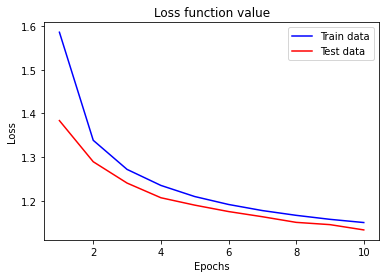

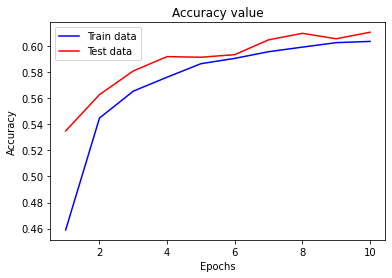

188/188 [==============================] - 3s 18ms/step - loss: 1.2111 - accuracy: 0.5763


In [19]:
plot_results_train(history)

cm_train = rna.evaluate(x_train, y_train)
cm_val = rna.evaluate(x_val, y_val)
cm_test = rna.evaluate(x_test, y_test)

The first train wasn't very successful achieving an accuracy of about 60%, but still better than a random generator 10%.

To further improve the results, only the LAST convolutional layer will be unfrozen for training.

## Model training

In [20]:
# Unfreeze the layers from the block5 and adds a dropout layer for overfitting treatment.
rna_base.trainable = True
set_trainable = False


for layer in rna_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
    if (layer.name == 'block5_conv1') or (layer.name == 'block5_conv2') or (layer.name == 'block5_conv3'):
      rna.add(layers.Dropout(0.6))
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


print('Parameters after the new refreezing =', len(rna.trainable_weights)) 

Parameters after the new refreezing = 8


In [21]:
# Configures the optmizer with regularization for overfitting issues.
# Notice that the learning rate is really small to don't change too much the convolutional layers.
adam = optimizers.Adam(learning_rate=1e-05, beta_1=0.9, beta_2=0.999)
rna.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

history = rna.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
1250/1250 [==============================] - 43s 33ms/step - loss: 5.4523 - accuracy: 0.2791 - val_loss: 4.7214 - val_accuracy: 0.5837
Epoch 2/100
1250/1250 [==============================] - 41s 33ms/step - loss: 4.4826 - accuracy: 0.3036 - val_loss: 5.1656 - val_accuracy: 0.5988
Epoch 3/100
1250/1250 [==============================] - 41s 33ms/step - loss: 4.2407 - accuracy: 0.3124 - val_loss: 4.8801 - val_accuracy: 0.6222
Epoch 4/100
1250/1250 [==============================] - 41s 33ms/step - loss: 4.0438 - accuracy: 0.3190 - val_loss: 5.0499 - val_accuracy: 0.6180
Epoch 5/100
1250/1250 [==============================] - 41s 33ms/step - loss: 3.9385 - accuracy: 0.3248 - val_loss: 4.4500 - val_accuracy: 0.6602
Epoch 6/100
1250/1250 [==============================] - 41s 33ms/step - loss: 3.8161 - accuracy: 0.3323 - val_loss: 4.7262 - val_accuracy: 0.6502
Epoch 7/100
1250/1250 [==============================] - 41s 33ms/step - loss: 3.7892 - accuracy: 0.3338 - val_loss: 4

## Validation 2

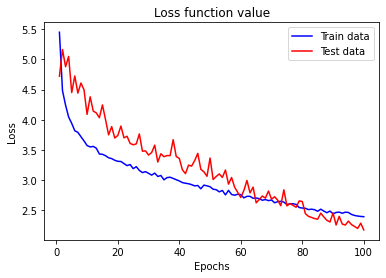

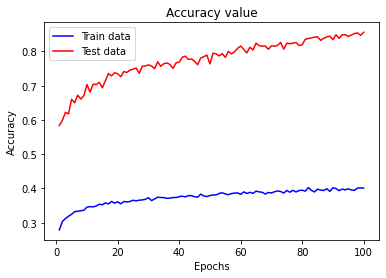

In [22]:
plot_results_train(history)

In [23]:
cm_train = rna.evaluate(x_train, y_train)
cm_val = rna.evaluate(x_val, y_val)
cm_test = rna.evaluate(x_test, y_test)

188/188 [==============================] - 3s 18ms/step - loss: 3.8078 - accuracy: 0.7402


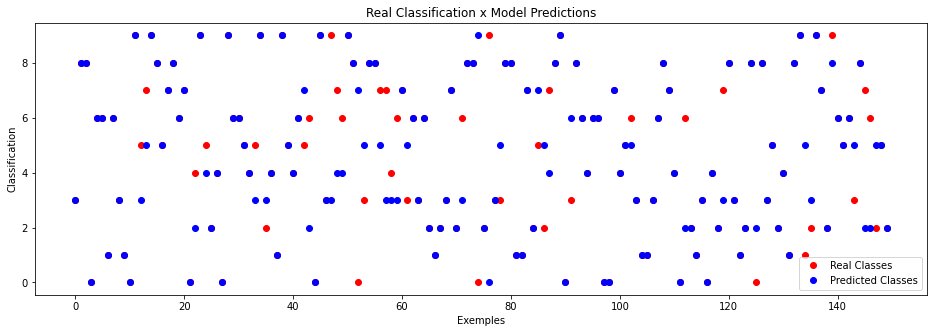

In [24]:
y_prev = rna.predict(x_test)
classe = np.argmax(y_prev, axis=1)

# 150 first classes predicted. Blue dots are right predictions and red ones wrong.
plt.figure(figsize=(16, 5))
plt.plot(y_test[:150], 'ro', label='Real Classes')
plt.plot(classe[:150], 'bo', label='Predicted Classes')
plt.title('Real Classification x Model Predictions')
plt.xlabel('Exemples')
plt.ylabel('Classification')
plt.legend()
plt.show()

## Results

Real Class/Preticted Class


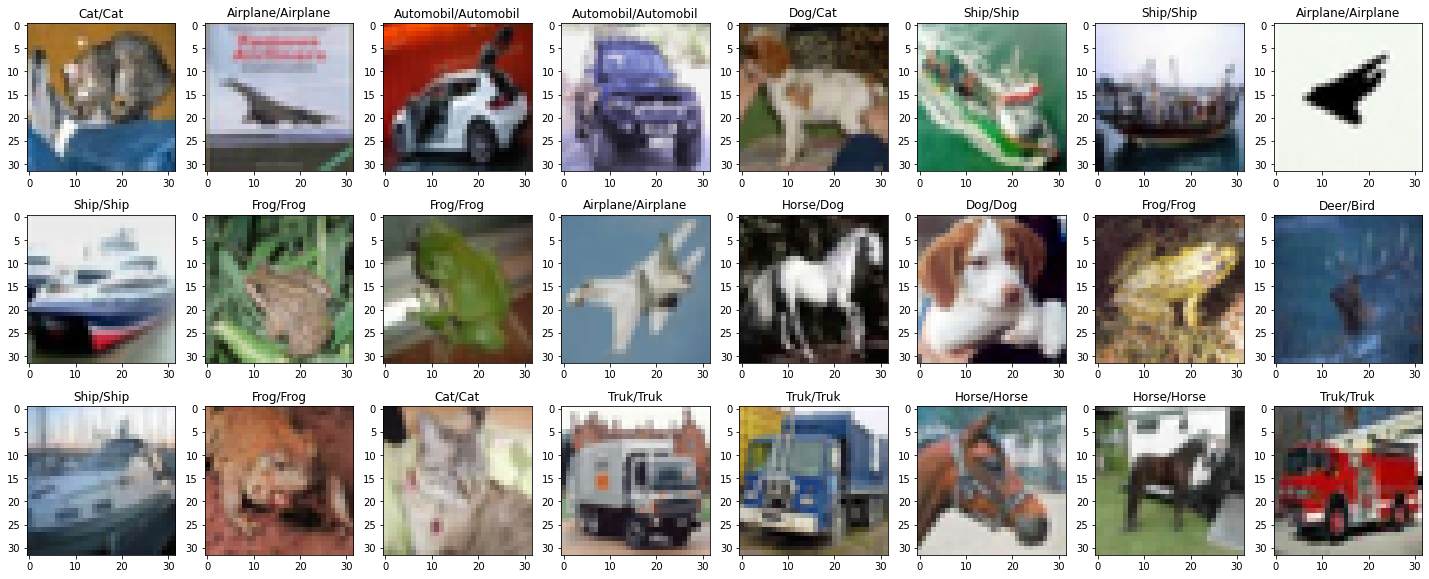

In [46]:
# Image prediction exemples
fig, axs = plt.subplots(3, 8, figsize=(25, 10))
index = 0
print('Real Class/Preticted Class')
for j in range(8):
  for k in range(3):
    axs[k,j].imshow(x_test_orig[index])
    text = f'{classes_dict[y_test[index][0]]}/{classes_dict[classe[index]]}'
    axs[k,j].title.set_text(text)
    index += 1
plt.show()

## Conclusion

To do a multiclass classification with Neural Network, it is important to encode the output to the respective number of classes present on the dataset. The most common encoding is the One-Hot-Enconder.

Be aware to use the categorical_crossentropy loss function for these types of problems.

Using an already trained network VGG16 saved us much time in this job, since the convolutional layers learn image patterns and we just had to train how to identify thoses patterns into the respective classification.

The final model accuracy was around 75%, while a random generator would be 10%.

In this particular problem, I struggled a lot with overfitting requiring me to use a lot of techniques to try to avoid it.

The way the network was architected required over 14M paramiters to train it, taking a long time to successfully do it well.

Better results can be achieved with:
- Different network architecture;
- Different hyperparameters;
- Higher computational power to process more epochs during training;
- Different overfitting techniques;
